In [1]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import pairwise_distances_argmin_min

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = SentenceTransformer('all-MiniLM-L6-v2')

## Milk Froth

In [3]:
csv_files = [
    'data/ablation_topic_froth.csv'
]

column_embeddings = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    count = 0
    for column in df.columns:
        # encode the column text data into embeddings
        embeddings = model.encode(df[column].astype(str).tolist())
        if column not in column_embeddings:
            column_embeddings[column] = []
        column_embeddings[column].extend(embeddings)


In [4]:
# Initialize an empty list to store all embeddings
all_embeddings = []

# Iterate over each column's embeddings and extend the all_embeddings list
for embeddings in column_embeddings.values():
    all_embeddings.extend(embeddings)

# Convert the list of all embeddings into a NumPy array
all_embeddings_array = np.array(all_embeddings)

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

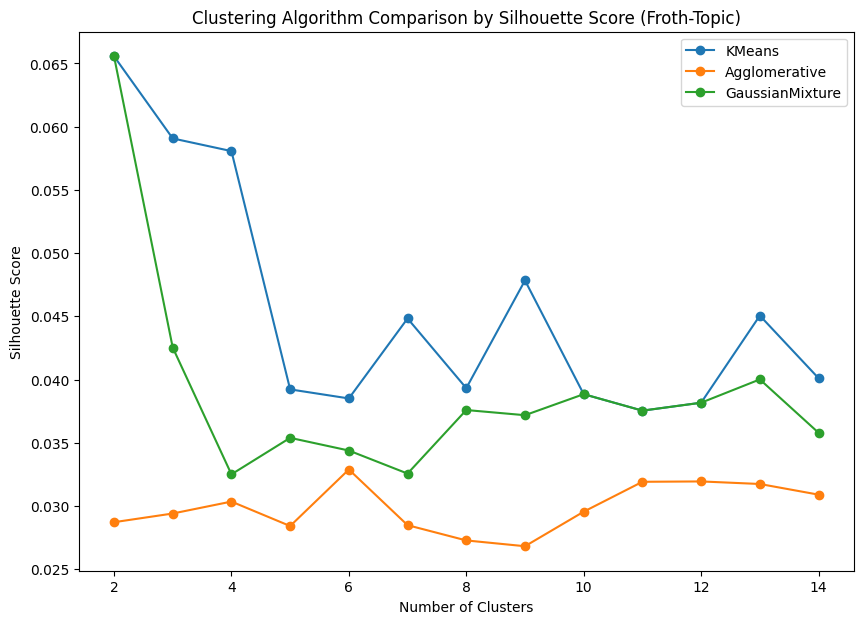

In [5]:
# Define a range of cluster numbers to evaluate
cluster_range = range(2, 15)

# Define a dictionary to store silhouette scores for each algorithm
silhouette_scores = {
    'KMeans': [],
    'Agglomerative': [],
    'GaussianMixture': []
}

# Evaluate KMeans, Agglomerative Clustering, and Gaussian Mixture Models
for n_clusters in cluster_range:
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=3)
    kmeans_labels = kmeans.fit_predict(all_embeddings_array)
    silhouette_scores['KMeans'].append(silhouette_score(all_embeddings_array, kmeans_labels))
    
    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    agglomerative_labels = agglomerative.fit_predict(all_embeddings_array)
    silhouette_scores['Agglomerative'].append(silhouette_score(all_embeddings_array, agglomerative_labels))
    
    # Gaussian Mixture Models
    gmm = GaussianMixture(n_components=n_clusters, random_state=3)
    gmm_labels = gmm.fit_predict(all_embeddings_array)
    silhouette_scores['GaussianMixture'].append(silhouette_score(all_embeddings_array, gmm_labels))

# Plotting the silhouette scores for each algorithm
plt.figure(figsize=(10, 7))
for algorithm, scores in silhouette_scores.items():
    plt.plot(cluster_range, scores, marker='o', label=algorithm)

# change the topic each time you run this.
plt.title('Clustering Algorithm Comparison by Silhouette Score (Froth-Topic)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster 0: ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched', 'human-1', 'human-2']
Cluster 1: ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched', 'human-1', 'human-2']


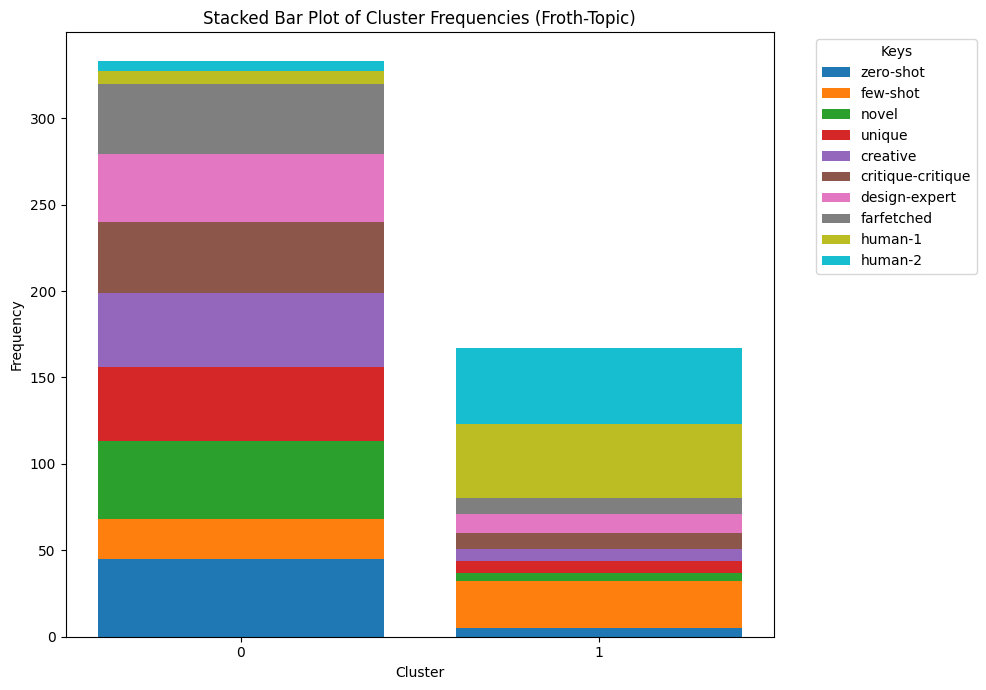

In [6]:
# List of CSV files
csv_files = [
    'data/ablation_topic_froth.csv'
]

column_embeddings = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    count = 0
    for column in df.columns:
        # encode the column text data into embeddings
        embeddings = model.encode(df[column].astype(str).tolist())
        if column not in column_embeddings:
            column_embeddings[column] = []
        column_embeddings[column].extend(embeddings)
        
# Flatten the embeddings into a single list and keep track of their column associations
all_embeddings = []
column_associations = []

for column, embeddings_list in column_embeddings.items():
    all_embeddings.extend(embeddings_list)
    column_associations.extend([column] * len(embeddings_list))

# Convert the list of embeddings into a NumPy array for clustering
# 50 solutions * 10 parameters (rows)
# 384 embeddings for each solution (columns)
all_embeddings_array = np.array(all_embeddings)

# Perform clustering
# Perform clustering on the embeddings
n_clusters = 2  # Set the number of clusters you want
kmeans = KMeans(n_clusters=n_clusters, random_state=3)
cluster_labels = kmeans.fit_predict(all_embeddings_array)

# Now, let's associate the cluster labels with their respective columns
clustered_embeddings = {
    'embeddings': all_embeddings,
    'columns': column_associations,
    'cluster_labels': cluster_labels.tolist()
}

# To analyze the clusters, let's see which columns are present in each cluster
cluster_column_associations = {i: [] for i in range(n_clusters)}

for i, label in enumerate(clustered_embeddings['cluster_labels']):
    column = clustered_embeddings['columns'][i]
    if column not in cluster_column_associations[label]:
        cluster_column_associations[label].append(column)

# Print out the column associations for each cluster
for cluster, columns in cluster_column_associations.items():
    print(f"Cluster {cluster}: {columns}")

# Optionally, you can create a DataFrame for better visualization and analysis
df_cluster_analysis = pd.DataFrame({
    'Embedding': clustered_embeddings['embeddings'],
    'Column': clustered_embeddings['columns'],
    'ClusterLabel': clustered_embeddings['cluster_labels']
})

# Count the occurrences of each column in each cluster
# we use a counter to maximize the efficiency of this process
cluster_column_counts = {}
for label, column in zip(clustered_embeddings['cluster_labels'], clustered_embeddings['columns']):
    if label not in cluster_column_counts:
        cluster_column_counts[label] = Counter()
    cluster_column_counts[label][column] += 1

# Prepare data for the stacked bar chart
cluster_bars = {}
for cluster, counts in cluster_column_counts.items():
    for column, count in counts.items():
        if column not in cluster_bars:
            cluster_bars[column] = [0] * len(cluster_column_counts)  # Initialize list for each column
        cluster_bars[column][cluster] = count
    
# Prepare the data for plotting
clusters = range(len(next(iter(cluster_bars.values()))))  # Assuming all lists are the same length
keys = cluster_bars.keys()
bottoms = [0] * len(clusters)

# Plot the stacked bar chart
plt.figure(figsize=(10, 7))  # Adjust the size as needed

for key in keys:
    values = cluster_bars[key]
    plt.bar(clusters, values, bottom=bottoms, label=key)
    bottoms = [sum(x) for x in zip(bottoms, values)]

plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Stacked Bar Plot of Cluster Frequencies (Froth-Topic)')
plt.xticks(clusters, [i for i in clusters])
plt.legend(title='Keys', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
# Perform PCA to reduce the embeddings to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings_2d = pca.fit_transform(all_embeddings_array)

# Create a DataFrame for the reduced embeddings with cluster labels and column names
df_embeddings_2d = pd.DataFrame(reduced_embeddings_2d, columns=['PCA1', 'PCA2'])
df_embeddings_2d['ClusterLabel'] = cluster_labels
df_embeddings_2d['Column'] = column_associations

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(df_embeddings_2d, x='PCA1', y='PCA2', color='ClusterLabel', hover_data=['Column'], title='2D Visualization of Clustered Embeddings (Froth-Topic)')

# Customize the layout
fig.update_layout(
    coloraxis_colorbar=dict(title='Cluster Label'),
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2'
)

# Show the plot
fig.show()

In [8]:
# Perform PCA to reduce the embeddings to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings_2d = pca.fit_transform(all_embeddings_array)

# Create a DataFrame for the reduced embeddings with cluster labels and column names
df_embeddings_2d = pd.DataFrame(reduced_embeddings_2d, columns=['PCA1', 'PCA2'])
df_embeddings_2d['ClusterLabel'] = cluster_labels
df_embeddings_2d['Column'] = column_associations

# Define a color mapping with bold colors for 'Human-50-2v' and 'Human-50-1v', and neutral colors for others
unique_columns = df_embeddings_2d['Column'].unique()
color_mapping = {column: 'lightgrey' for column in unique_columns}  # Start with all neutral colors
color_mapping['human-1'] = 'blue'  # Assign a bold color for 'Human-50-2v'
color_mapping['human-2'] = 'red'   # Assign a bold color for 'Human-50-1v'

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(df_embeddings_2d, x='PCA1', y='PCA2', color='Column', hover_data=['Column', 'ClusterLabel'], title='2D Visualization of Embeddings Colored by Column (Froth-Topic)', color_discrete_map=color_mapping)

# Customize the layout
fig.update_layout(
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    legend_title='Column'
)

# Show the plot
fig.show()

## Exercise

In [9]:
csv_files = [
    'data/ablation_topic_exercise.csv'
]

column_embeddings = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    count = 0
    for column in df.columns:
        # encode the column text data into embeddings
        embeddings = model.encode(df[column].astype(str).tolist())
        if column not in column_embeddings:
            column_embeddings[column] = []
        column_embeddings[column].extend(embeddings)

In [10]:
# Initialize an empty list to store all embeddings
all_embeddings = []

# Iterate over each column's embeddings and extend the all_embeddings list
for embeddings in column_embeddings.values():
    all_embeddings.extend(embeddings)

# Convert the list of all embeddings into a NumPy array
all_embeddings_array = np.array(all_embeddings)

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

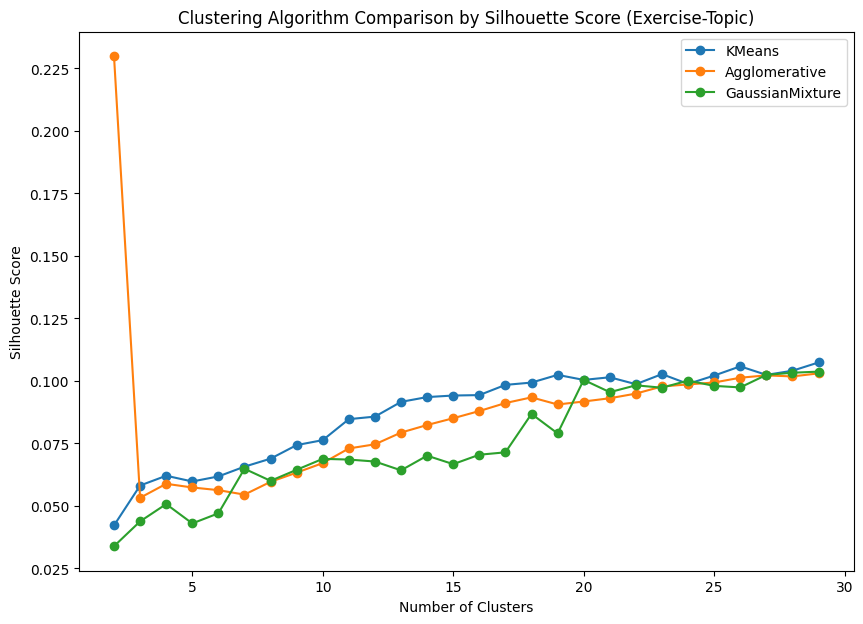

In [11]:
# Define a range of cluster numbers to evaluate
cluster_range = range(2, 30)

# Define a dictionary to store silhouette scores for each algorithm
silhouette_scores = {
    'KMeans': [],
    'Agglomerative': [],
    'GaussianMixture': []
}

# Evaluate KMeans, Agglomerative Clustering, and Gaussian Mixture Models
for n_clusters in cluster_range:
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=3)
    kmeans_labels = kmeans.fit_predict(all_embeddings_array)
    silhouette_scores['KMeans'].append(silhouette_score(all_embeddings_array, kmeans_labels))
    
    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    agglomerative_labels = agglomerative.fit_predict(all_embeddings_array)
    silhouette_scores['Agglomerative'].append(silhouette_score(all_embeddings_array, agglomerative_labels))
    
    # Gaussian Mixture Models
    gmm = GaussianMixture(n_components=n_clusters, random_state=3)
    gmm_labels = gmm.fit_predict(all_embeddings_array)
    silhouette_scores['GaussianMixture'].append(silhouette_score(all_embeddings_array, gmm_labels))

# Plotting the silhouette scores for each algorithm
plt.figure(figsize=(10, 7))
for algorithm, scores in silhouette_scores.items():
    plt.plot(cluster_range, scores, marker='o', label=algorithm)

# change the topic each time you run this.
plt.title('Clustering Algorithm Comparison by Silhouette Score (Exercise-Topic)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

Cluster 0: ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched', 'human-1', 'human-2']
Cluster 1: ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched', 'human-2']


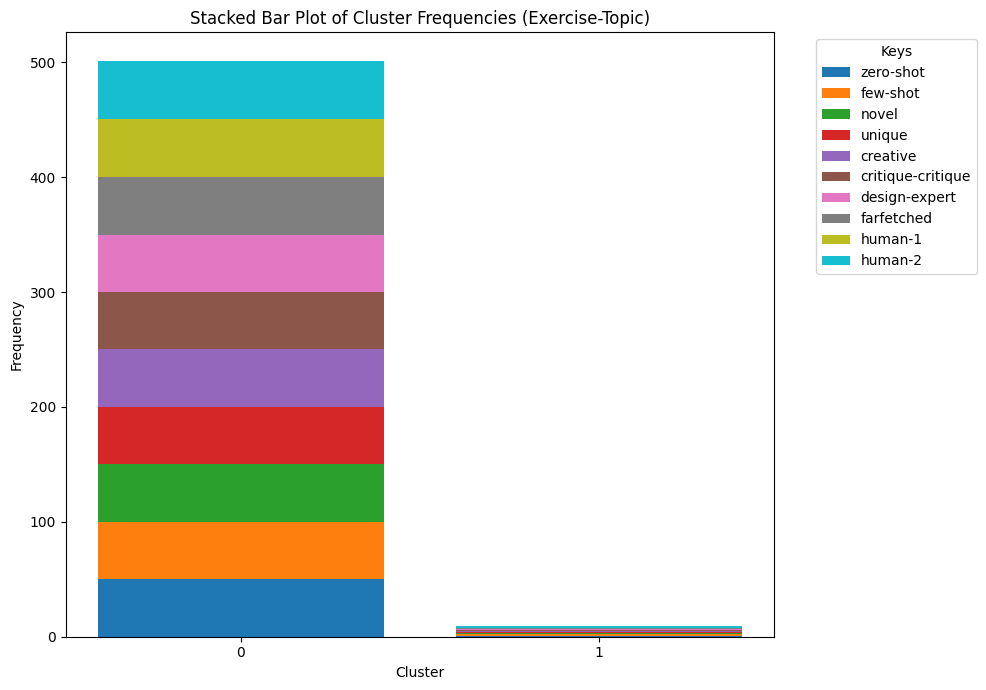

In [12]:
# List of CSV files
csv_files = [
    'data/ablation_topic_exercise.csv'
]

column_embeddings = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    count = 0
    for column in df.columns:
        # encode the column text data into embeddings
        embeddings = model.encode(df[column].astype(str).tolist())
        if column not in column_embeddings:
            column_embeddings[column] = []
        column_embeddings[column].extend(embeddings)
        
# Flatten the embeddings into a single list and keep track of their column associations
all_embeddings = []
column_associations = []

for column, embeddings_list in column_embeddings.items():
    all_embeddings.extend(embeddings_list)
    column_associations.extend([column] * len(embeddings_list))

# Convert the list of embeddings into a NumPy array for clustering
# 50 solutions * 10 parameters (rows)
# 384 embeddings for each solution (columns)
all_embeddings_array = np.array(all_embeddings)

# Perform clustering
# Perform clustering on the embeddings
n_clusters = 2  # Set the number of clusters you want
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agglomerative.fit_predict(all_embeddings_array)

# Now, let's associate the cluster labels with their respective columns
clustered_embeddings = {
    'embeddings': all_embeddings,
    'columns': column_associations,
    'cluster_labels': cluster_labels.tolist()
}

# To analyze the clusters, let's see which columns are present in each cluster
cluster_column_associations = {i: [] for i in range(n_clusters)}

for i, label in enumerate(clustered_embeddings['cluster_labels']):
    column = clustered_embeddings['columns'][i]
    if column not in cluster_column_associations[label]:
        cluster_column_associations[label].append(column)

# Print out the column associations for each cluster
for cluster, columns in cluster_column_associations.items():
    print(f"Cluster {cluster}: {columns}")

# Optionally, you can create a DataFrame for better visualization and analysis
df_cluster_analysis = pd.DataFrame({
    'Embedding': clustered_embeddings['embeddings'],
    'Column': clustered_embeddings['columns'],
    'ClusterLabel': clustered_embeddings['cluster_labels']
})

# Count the occurrences of each column in each cluster
# we use a counter to maximize the efficiency of this process
cluster_column_counts = {}
for label, column in zip(clustered_embeddings['cluster_labels'], clustered_embeddings['columns']):
    if label not in cluster_column_counts:
        cluster_column_counts[label] = Counter()
    cluster_column_counts[label][column] += 1

# Prepare data for the stacked bar chart
cluster_bars = {}
for cluster, counts in cluster_column_counts.items():
    for column, count in counts.items():
        if column not in cluster_bars:
            cluster_bars[column] = [0] * len(cluster_column_counts)  # Initialize list for each column
        cluster_bars[column][cluster] = count
    
# Prepare the data for plotting
clusters = range(len(next(iter(cluster_bars.values()))))  # Assuming all lists are the same length
keys = cluster_bars.keys()
bottoms = [0] * len(clusters)

# Plot the stacked bar chart
plt.figure(figsize=(10, 7))  # Adjust the size as needed

for key in keys:
    values = cluster_bars[key]
    plt.bar(clusters, values, bottom=bottoms, label=key)
    bottoms = [sum(x) for x in zip(bottoms, values)]

plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Stacked Bar Plot of Cluster Frequencies (Exercise-Topic)')
plt.xticks(clusters, [i for i in clusters])
plt.legend(title='Keys', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Perform PCA to reduce the embeddings to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings_2d = pca.fit_transform(all_embeddings_array)

# Create a DataFrame for the reduced embeddings with cluster labels and column names
df_embeddings_2d = pd.DataFrame(reduced_embeddings_2d, columns=['PCA1', 'PCA2'])
df_embeddings_2d['ClusterLabel'] = cluster_labels
df_embeddings_2d['Column'] = column_associations

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(df_embeddings_2d, x='PCA1', y='PCA2', color='ClusterLabel', hover_data=['Column'], title='2D Visualization of Clustered Embeddings (Exercise-Topic)')

# Customize the layout
fig.update_layout(
    coloraxis_colorbar=dict(title='Cluster Label'),
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2'
)

# Show the plot
fig.show()

In [14]:
# Perform PCA to reduce the embeddings to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings_2d = pca.fit_transform(all_embeddings_array)

# Create a DataFrame for the reduced embeddings with cluster labels and column names
df_embeddings_2d = pd.DataFrame(reduced_embeddings_2d, columns=['PCA1', 'PCA2'])
df_embeddings_2d['ClusterLabel'] = cluster_labels
df_embeddings_2d['Column'] = column_associations

# Define a color mapping with bold colors for 'Human-50-2v' and 'Human-50-1v', and neutral colors for others
unique_columns = df_embeddings_2d['Column'].unique()
color_mapping = {column: 'lightgrey' for column in unique_columns}  # Start with all neutral colors
color_mapping['human-1'] = 'blue'  # Assign a bold color for 'Human-50-2v'
color_mapping['human-2'] = 'red'   # Assign a bold color for 'Human-50-1v'

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(df_embeddings_2d, x='PCA1', y='PCA2', color='Column', hover_data=['Column', 'ClusterLabel'], title='2D Visualization of Embeddings Colored by Column (Exercise-Topic)', color_discrete_map=color_mapping)

# Customize the layout
fig.update_layout(
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    legend_title='Column'
)

# Show the plot
fig.show()

## Time

In [15]:
csv_files = [
    'data/ablation_topic_time.csv'
]

column_embeddings = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    count = 0
    for column in df.columns:
        # encode the column text data into embeddings
        embeddings = model.encode(df[column].astype(str).tolist())
        if column not in column_embeddings:
            column_embeddings[column] = []
        column_embeddings[column].extend(embeddings)

In [16]:
# Initialize an empty list to store all embeddings
all_embeddings = []

# Iterate over each column's embeddings and extend the all_embeddings list
for embeddings in column_embeddings.values():
    all_embeddings.extend(embeddings)

# Convert the list of all embeddings into a NumPy array
all_embeddings_array = np.array(all_embeddings)

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

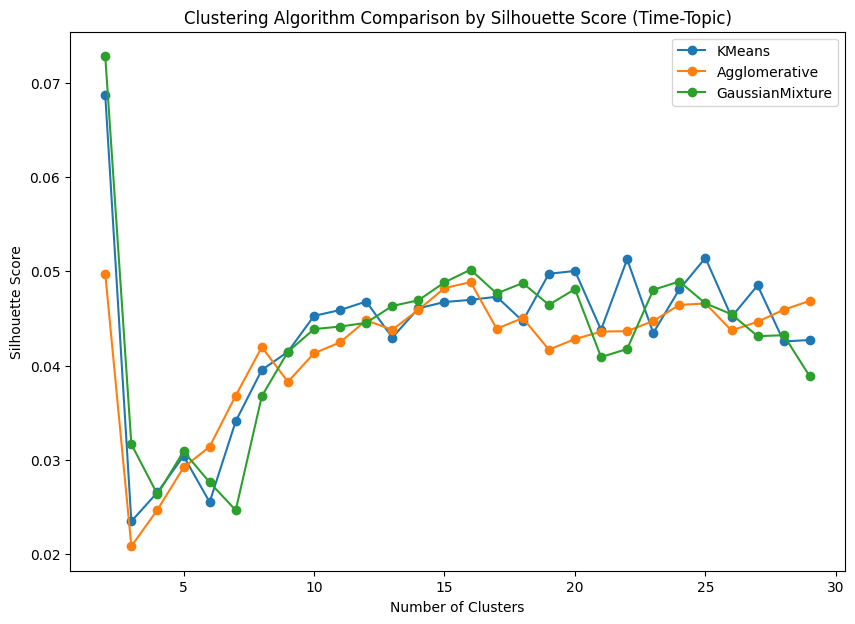

In [17]:
# Define a range of cluster numbers to evaluate
cluster_range = range(2, 30)

# Define a dictionary to store silhouette scores for each algorithm
silhouette_scores = {
    'KMeans': [],
    'Agglomerative': [],
    'GaussianMixture': []
}

# Evaluate KMeans, Agglomerative Clustering, and Gaussian Mixture Models
for n_clusters in cluster_range:
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=3)
    kmeans_labels = kmeans.fit_predict(all_embeddings_array)
    silhouette_scores['KMeans'].append(silhouette_score(all_embeddings_array, kmeans_labels))
    
    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    agglomerative_labels = agglomerative.fit_predict(all_embeddings_array)
    silhouette_scores['Agglomerative'].append(silhouette_score(all_embeddings_array, agglomerative_labels))
    
    # Gaussian Mixture Models
    gmm = GaussianMixture(n_components=n_clusters, random_state=3)
    gmm_labels = gmm.fit_predict(all_embeddings_array)
    silhouette_scores['GaussianMixture'].append(silhouette_score(all_embeddings_array, gmm_labels))

# Plotting the silhouette scores for each algorithm
plt.figure(figsize=(10, 7))
for algorithm, scores in silhouette_scores.items():
    plt.plot(cluster_range, scores, marker='o', label=algorithm)

# change the topic each time you run this.
plt.title('Clustering Algorithm Comparison by Silhouette Score (Time-Topic)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Cluster 0: ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched', 'human-1', 'human-2']
Cluster 1: ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched', 'human-1', 'human-2']


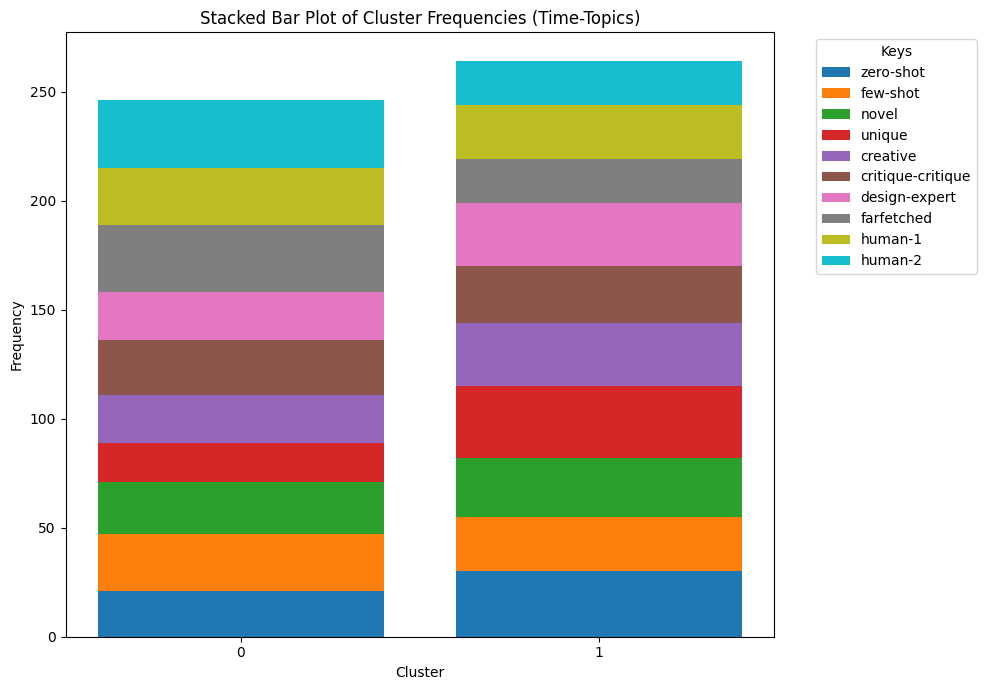

In [18]:
# List of CSV files
csv_files = [
    'data/ablation_topic_exercise.csv'
]

column_embeddings = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    count = 0
    for column in df.columns:
        # encode the column text data into embeddings
        embeddings = model.encode(df[column].astype(str).tolist())
        if column not in column_embeddings:
            column_embeddings[column] = []
        column_embeddings[column].extend(embeddings)
        
# Flatten the embeddings into a single list and keep track of their column associations
all_embeddings = []
column_associations = []

for column, embeddings_list in column_embeddings.items():
    all_embeddings.extend(embeddings_list)
    column_associations.extend([column] * len(embeddings_list))

# Convert the list of embeddings into a NumPy array for clustering
# 50 solutions * 10 parameters (rows)
# 384 embeddings for each solution (columns)
all_embeddings_array = np.array(all_embeddings)

# Perform clustering
# Perform clustering on the embeddings
n_clusters = 2  # Set the number of clusters you want
kmeans = KMeans(n_clusters=n_clusters, random_state=3)
cluster_labels = kmeans.fit_predict(all_embeddings_array)

# Now, let's associate the cluster labels with their respective columns
clustered_embeddings = {
    'embeddings': all_embeddings,
    'columns': column_associations,
    'cluster_labels': cluster_labels.tolist()
}

# To analyze the clusters, let's see which columns are present in each cluster
cluster_column_associations = {i: [] for i in range(n_clusters)}

for i, label in enumerate(clustered_embeddings['cluster_labels']):
    column = clustered_embeddings['columns'][i]
    if column not in cluster_column_associations[label]:
        cluster_column_associations[label].append(column)

# Print out the column associations for each cluster
for cluster, columns in cluster_column_associations.items():
    print(f"Cluster {cluster}: {columns}")

# Optionally, you can create a DataFrame for better visualization and analysis
df_cluster_analysis = pd.DataFrame({
    'Embedding': clustered_embeddings['embeddings'],
    'Column': clustered_embeddings['columns'],
    'ClusterLabel': clustered_embeddings['cluster_labels']
})

# Count the occurrences of each column in each cluster
# we use a counter to maximize the efficiency of this process
cluster_column_counts = {}
for label, column in zip(clustered_embeddings['cluster_labels'], clustered_embeddings['columns']):
    if label not in cluster_column_counts:
        cluster_column_counts[label] = Counter()
    cluster_column_counts[label][column] += 1

# Prepare data for the stacked bar chart
cluster_bars = {}
for cluster, counts in cluster_column_counts.items():
    for column, count in counts.items():
        if column not in cluster_bars:
            cluster_bars[column] = [0] * len(cluster_column_counts)  # Initialize list for each column
        cluster_bars[column][cluster] = count
    
# Prepare the data for plotting
clusters = range(len(next(iter(cluster_bars.values()))))  # Assuming all lists are the same length
keys = cluster_bars.keys()
bottoms = [0] * len(clusters)

# Plot the stacked bar chart
plt.figure(figsize=(10, 7))  # Adjust the size as needed

for key in keys:
    values = cluster_bars[key]
    plt.bar(clusters, values, bottom=bottoms, label=key)
    bottoms = [sum(x) for x in zip(bottoms, values)]

plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Stacked Bar Plot of Cluster Frequencies (Time-Topics)')
plt.xticks(clusters, [i for i in clusters])
plt.legend(title='Keys', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

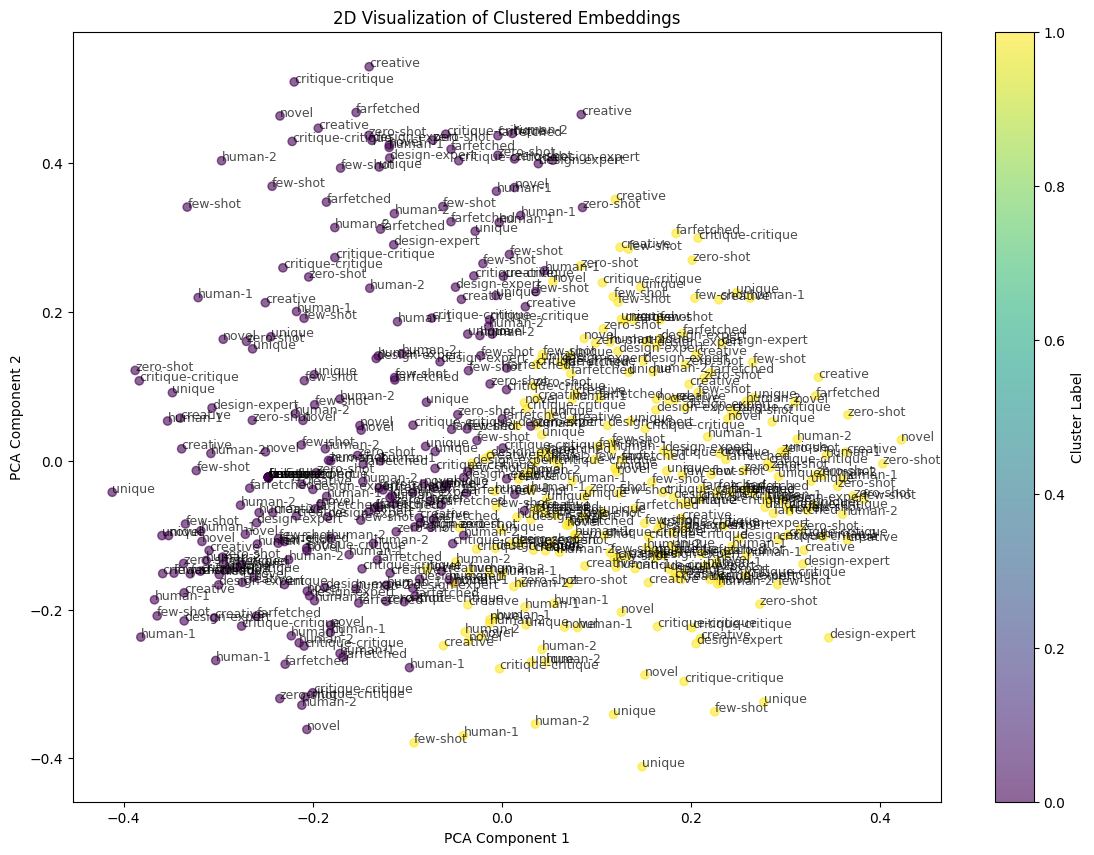

In [19]:
# Perform PCA to reduce the embeddings to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings_2d = pca.fit_transform(all_embeddings_array)

# Create a scatter plot of the reduced data
plt.figure(figsize=(14, 10))
scatter = plt.scatter(reduced_embeddings_2d[:, 0], reduced_embeddings_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)

# Annotate the points with their corresponding column names
for i, column_name in enumerate(column_associations):
    plt.annotate(column_name, (reduced_embeddings_2d[i, 0], reduced_embeddings_2d[i, 1]), fontsize=9, alpha=0.7)

# Add a color bar for the clusters
plt.colorbar(scatter, label='Cluster Label')

# Set the title and labels
plt.title('2D Visualization of Clustered Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Show the plot
plt.show()

In [20]:
# Perform PCA to reduce the embeddings to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings_2d = pca.fit_transform(all_embeddings_array)

# Create a DataFrame for the reduced embeddings with cluster labels and column names
df_embeddings_2d = pd.DataFrame(reduced_embeddings_2d, columns=['PCA1', 'PCA2'])
df_embeddings_2d['ClusterLabel'] = cluster_labels
df_embeddings_2d['Column'] = column_associations

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(df_embeddings_2d, x='PCA1', y='PCA2', color='ClusterLabel', hover_data=['Column'], title='2D Visualization of Clustered Embeddings (Time-Topics)')

# Customize the layout
fig.update_layout(
    coloraxis_colorbar=dict(title='Cluster Label'),
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2'
)

# Show the plot
fig.show()

In [21]:
# Perform PCA to reduce the embeddings to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings_2d = pca.fit_transform(all_embeddings_array)

# Create a DataFrame for the reduced embeddings with cluster labels and column names
df_embeddings_2d = pd.DataFrame(reduced_embeddings_2d, columns=['PCA1', 'PCA2'])
df_embeddings_2d['ClusterLabel'] = cluster_labels
df_embeddings_2d['Column'] = column_associations

# Define a color mapping with bold colors for 'Human-50-2v' and 'Human-50-1v', and neutral colors for others
unique_columns = df_embeddings_2d['Column'].unique()
color_mapping = {column: 'lightgrey' for column in unique_columns}  # Start with all neutral colors
color_mapping['human-1'] = 'blue'  # Assign a bold color for 'Human-50-2v'
color_mapping['human-2'] = 'red'   # Assign a bold color for 'Human-50-1v'

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(df_embeddings_2d, x='PCA1', y='PCA2', color='Column', hover_data=['Column', 'ClusterLabel'], title='2D Visualization of Embeddings Colored by Column (Time-Topics)', color_discrete_map=color_mapping)

# Customize the layout
fig.update_layout(
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    legend_title='Column'
)

# Show the plot
fig.show()

## Powder

In [22]:
csv_files = [
    'data/ablation_topic_powder.csv'
]

column_embeddings = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    count = 0
    for column in df.columns:
        # encode the column text data into embeddings
        embeddings = model.encode(df[column].astype(str).tolist())
        if column not in column_embeddings:
            column_embeddings[column] = []
        column_embeddings[column].extend(embeddings)

In [23]:
# Initialize an empty list to store all embeddings
all_embeddings = []

# Iterate over each column's embeddings and extend the all_embeddings list
for embeddings in column_embeddings.values():
    all_embeddings.extend(embeddings)

# Convert the list of all embeddings into a NumPy array
all_embeddings_array = np.array(all_embeddings)

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

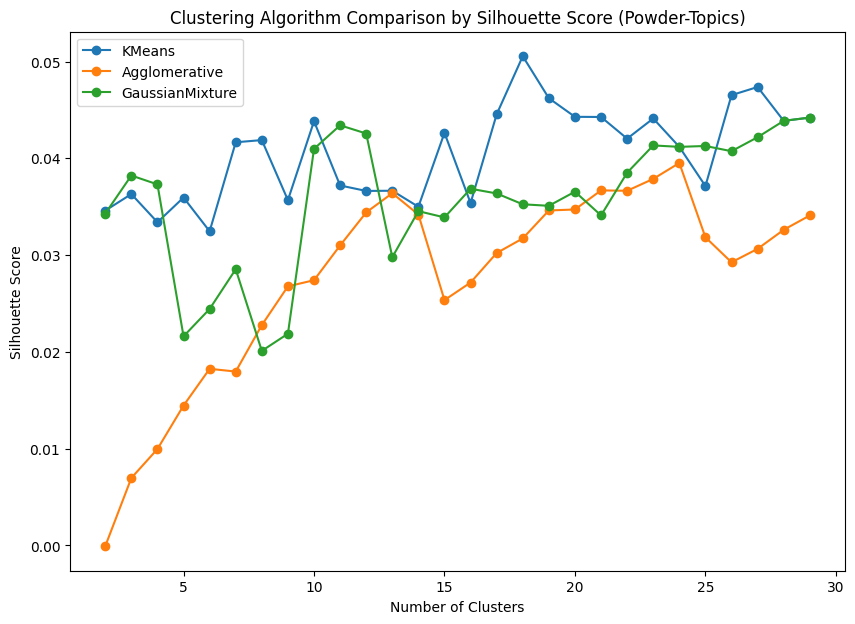

In [24]:
# Define a range of cluster numbers to evaluate
cluster_range = range(2, 30)

# Define a dictionary to store silhouette scores for each algorithm
silhouette_scores = {
    'KMeans': [],
    'Agglomerative': [],
    'GaussianMixture': []
}

# Evaluate KMeans, Agglomerative Clustering, and Gaussian Mixture Models
for n_clusters in cluster_range:
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=3)
    kmeans_labels = kmeans.fit_predict(all_embeddings_array)
    silhouette_scores['KMeans'].append(silhouette_score(all_embeddings_array, kmeans_labels))
    
    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    agglomerative_labels = agglomerative.fit_predict(all_embeddings_array)
    silhouette_scores['Agglomerative'].append(silhouette_score(all_embeddings_array, agglomerative_labels))
    
    # Gaussian Mixture Models
    gmm = GaussianMixture(n_components=n_clusters, random_state=3)
    gmm_labels = gmm.fit_predict(all_embeddings_array)
    silhouette_scores['GaussianMixture'].append(silhouette_score(all_embeddings_array, gmm_labels))

# Plotting the silhouette scores for each algorithm
plt.figure(figsize=(10, 7))
for algorithm, scores in silhouette_scores.items():
    plt.plot(cluster_range, scores, marker='o', label=algorithm)

# change the topic each time you run this.
plt.title('Clustering Algorithm Comparison by Silhouette Score (Powder-Topics)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Cluster 0: ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched', 'human-2']
Cluster 1: ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched', 'human-1', 'human-2']
Cluster 2: ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched', 'human-1', 'human-2']
Cluster 3: ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched', 'human-1', 'human-2']
Cluster 4: ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched', 'human-1']
Cluster 5: ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched', 'human-1', 'human-2']
Cluster 6: ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched', 'human-1', 'human-2']
Cluster 7: ['zero-shot', 'no

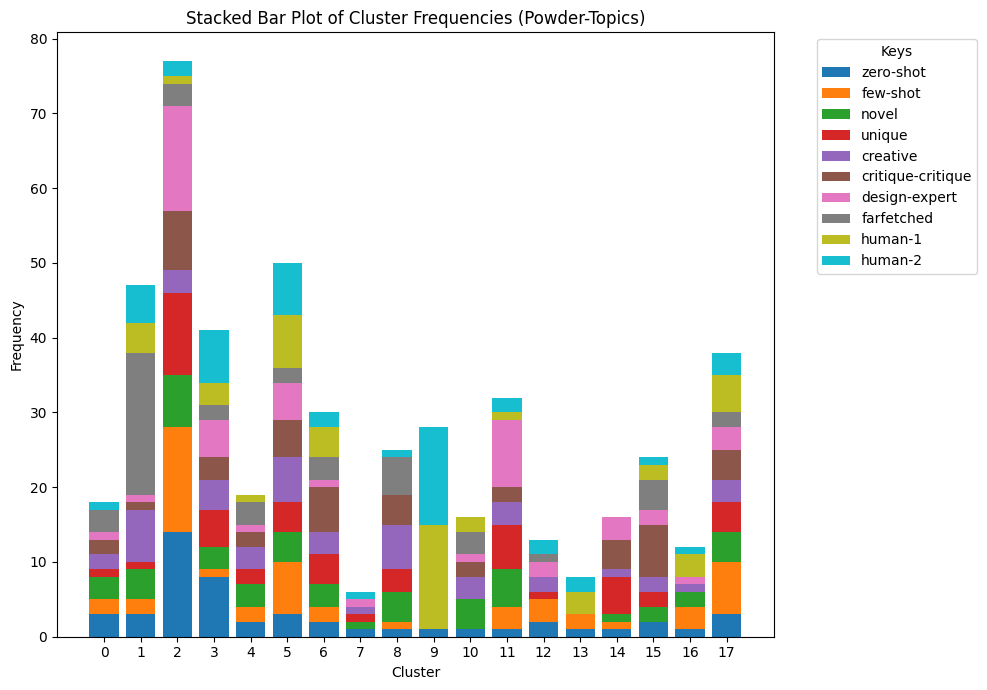

In [25]:
# List of CSV files
csv_files = [
    'data/ablation_topic_powder.csv'
]

column_embeddings = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    count = 0
    for column in df.columns:
        # encode the column text data into embeddings
        embeddings = model.encode(df[column].astype(str).tolist())
        if column not in column_embeddings:
            column_embeddings[column] = []
        column_embeddings[column].extend(embeddings)
        
# Flatten the embeddings into a single list and keep track of their column associations
all_embeddings = []
column_associations = []

for column, embeddings_list in column_embeddings.items():
    all_embeddings.extend(embeddings_list)
    column_associations.extend([column] * len(embeddings_list))

# Convert the list of embeddings into a NumPy array for clustering
# 50 solutions * 10 parameters (rows)
# 384 embeddings for each solution (columns)
all_embeddings_array = np.array(all_embeddings)

# Perform clustering
# Perform clustering on the embeddings
n_clusters = 18  # Set the number of clusters you want
kmeans = KMeans(n_clusters=n_clusters, random_state=3)
cluster_labels = kmeans.fit_predict(all_embeddings_array)

# Now, let's associate the cluster labels with their respective columns
clustered_embeddings = {
    'embeddings': all_embeddings,
    'columns': column_associations,
    'cluster_labels': cluster_labels.tolist()
}

# To analyze the clusters, let's see which columns are present in each cluster
cluster_column_associations = {i: [] for i in range(n_clusters)}

for i, label in enumerate(clustered_embeddings['cluster_labels']):
    column = clustered_embeddings['columns'][i]
    if column not in cluster_column_associations[label]:
        cluster_column_associations[label].append(column)

# Print out the column associations for each cluster
for cluster, columns in cluster_column_associations.items():
    print(f"Cluster {cluster}: {columns}")

# Optionally, you can create a DataFrame for better visualization and analysis
df_cluster_analysis = pd.DataFrame({
    'Embedding': clustered_embeddings['embeddings'],
    'Column': clustered_embeddings['columns'],
    'ClusterLabel': clustered_embeddings['cluster_labels']
})

# Count the occurrences of each column in each cluster
# we use a counter to maximize the efficiency of this process
cluster_column_counts = {}
for label, column in zip(clustered_embeddings['cluster_labels'], clustered_embeddings['columns']):
    if label not in cluster_column_counts:
        cluster_column_counts[label] = Counter()
    cluster_column_counts[label][column] += 1

# Prepare data for the stacked bar chart
cluster_bars = {}
for cluster, counts in cluster_column_counts.items():
    for column, count in counts.items():
        if column not in cluster_bars:
            cluster_bars[column] = [0] * len(cluster_column_counts)  # Initialize list for each column
        cluster_bars[column][cluster] = count
    
# Prepare the data for plotting
clusters = range(len(next(iter(cluster_bars.values()))))  # Assuming all lists are the same length
keys = cluster_bars.keys()
bottoms = [0] * len(clusters)

# Plot the stacked bar chart
plt.figure(figsize=(10, 7))  # Adjust the size as needed

for key in keys:
    values = cluster_bars[key]
    plt.bar(clusters, values, bottom=bottoms, label=key)
    bottoms = [sum(x) for x in zip(bottoms, values)]

plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Stacked Bar Plot of Cluster Frequencies (Powder-Topics)')
plt.xticks(clusters, [i for i in clusters])
plt.legend(title='Keys', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
# Perform PCA to reduce the embeddings to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings_2d = pca.fit_transform(all_embeddings_array)

# Create a DataFrame for the reduced embeddings with cluster labels and column names
df_embeddings_2d = pd.DataFrame(reduced_embeddings_2d, columns=['PCA1', 'PCA2'])
df_embeddings_2d['ClusterLabel'] = cluster_labels
df_embeddings_2d['Column'] = column_associations

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(df_embeddings_2d, x='PCA1', y='PCA2', color='ClusterLabel', hover_data=['Column'], title='2D Visualization of Clustered Embeddings (Powder-Topics)')

# Customize the layout
fig.update_layout(
    coloraxis_colorbar=dict(title='Cluster Label'),
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2'
)

# Show the plot
fig.show()

In [27]:
# Perform PCA to reduce the embeddings to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings_2d = pca.fit_transform(all_embeddings_array)

# Create a DataFrame for the reduced embeddings with cluster labels and column names
df_embeddings_2d = pd.DataFrame(reduced_embeddings_2d, columns=['PCA1', 'PCA2'])
df_embeddings_2d['ClusterLabel'] = cluster_labels
df_embeddings_2d['Column'] = column_associations

# Define a color mapping with bold colors for 'Human-50-2v' and 'Human-50-1v', and neutral colors for others
unique_columns = df_embeddings_2d['Column'].unique()
color_mapping = {column: 'lightgrey' for column in unique_columns}  # Start with all neutral colors
color_mapping['human-1'] = 'blue'  # Assign a bold color for 'Human-50-2v'
color_mapping['human-2'] = 'red'   # Assign a bold color for 'Human-50-1v'

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(df_embeddings_2d, x='PCA1', y='PCA2', color='Column', hover_data=['Column', 'ClusterLabel'], title='2D Visualization of Embeddings Colored by Column (Powder-Topics)', color_discrete_map=color_mapping)

# Customize the layout
fig.update_layout(
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    legend_title='Column'
)

# Show the plot
fig.show()

## Towels

In [28]:
csv_files = [
    'data/ablation_topic_towels.csv'
]

column_embeddings = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    count = 0
    for column in df.columns:
        # encode the column text data into embeddings
        embeddings = model.encode(df[column].astype(str).tolist())
        if column not in column_embeddings:
            column_embeddings[column] = []
        column_embeddings[column].extend(embeddings)

In [29]:
# Initialize an empty list to store all embeddings
all_embeddings = []

# Iterate over each column's embeddings and extend the all_embeddings list
for embeddings in column_embeddings.values():
    all_embeddings.extend(embeddings)

# Convert the list of all embeddings into a NumPy array
all_embeddings_array = np.array(all_embeddings)

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

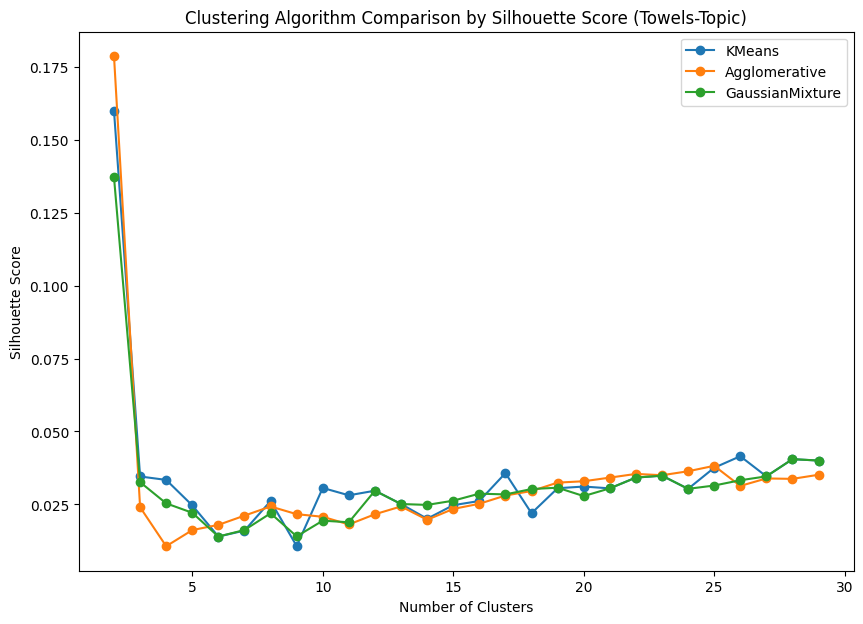

In [30]:
# Define a range of cluster numbers to evaluate
cluster_range = range(2, 30)

# Define a dictionary to store silhouette scores for each algorithm
silhouette_scores = {
    'KMeans': [],
    'Agglomerative': [],
    'GaussianMixture': []
}

# Evaluate KMeans, Agglomerative Clustering, and Gaussian Mixture Models
for n_clusters in cluster_range:
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=3)
    kmeans_labels = kmeans.fit_predict(all_embeddings_array)
    silhouette_scores['KMeans'].append(silhouette_score(all_embeddings_array, kmeans_labels))
    
    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    agglomerative_labels = agglomerative.fit_predict(all_embeddings_array)
    silhouette_scores['Agglomerative'].append(silhouette_score(all_embeddings_array, agglomerative_labels))
    
    # Gaussian Mixture Models
    gmm = GaussianMixture(n_components=n_clusters, random_state=3)
    gmm_labels = gmm.fit_predict(all_embeddings_array)
    silhouette_scores['GaussianMixture'].append(silhouette_score(all_embeddings_array, gmm_labels))

# Plotting the silhouette scores for each algorithm
plt.figure(figsize=(10, 7))
for algorithm, scores in silhouette_scores.items():
    plt.plot(cluster_range, scores, marker='o', label=algorithm)

# change the topic each time you run this.
plt.title('Clustering Algorithm Comparison by Silhouette Score (Towels-Topic)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\kevin\anaconda3\envs\research\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Cluster 0: ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'farfetched', 'human-1', 'human-2']
Cluster 1: ['zero-shot', 'few-shot', 'novel', 'unique', 'creative', 'critique-critique', 'design-expert', 'farfetched', 'human-1', 'human-2']


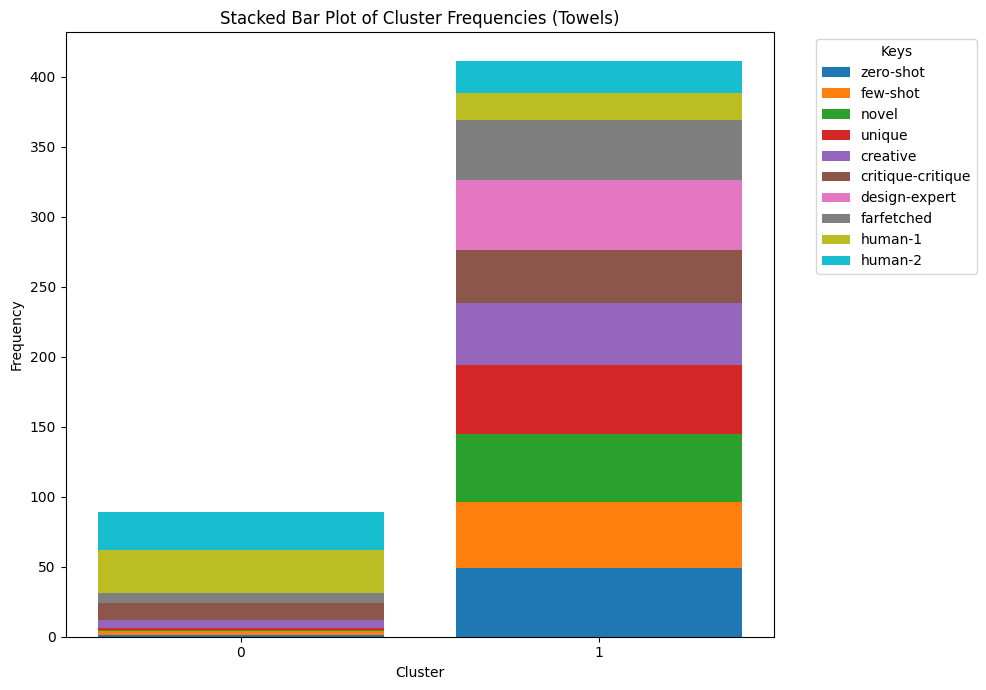

In [31]:
# List of CSV files
csv_files = [
    'data/ablation_topic_towels.csv'
]

column_embeddings = {}
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    count = 0
    for column in df.columns:
        # encode the column text data into embeddings
        embeddings = model.encode(df[column].astype(str).tolist())
        if column not in column_embeddings:
            column_embeddings[column] = []
        column_embeddings[column].extend(embeddings)
        
# Flatten the embeddings into a single list and keep track of their column associations
all_embeddings = []
column_associations = []

for column, embeddings_list in column_embeddings.items():
    all_embeddings.extend(embeddings_list)
    column_associations.extend([column] * len(embeddings_list))

# Convert the list of embeddings into a NumPy array for clustering
# 50 solutions * 10 parameters (rows)
# 384 embeddings for each solution (columns)
all_embeddings_array = np.array(all_embeddings)

# Perform clustering
# Perform clustering on the embeddings
n_clusters = 2  # Set the number of clusters you want
kmeans = KMeans(n_clusters=n_clusters, random_state=3)
cluster_labels = kmeans.fit_predict(all_embeddings_array)

# Now, let's associate the cluster labels with their respective columns
clustered_embeddings = {
    'embeddings': all_embeddings,
    'columns': column_associations,
    'cluster_labels': cluster_labels.tolist()
}

# To analyze the clusters, let's see which columns are present in each cluster
cluster_column_associations = {i: [] for i in range(n_clusters)}

for i, label in enumerate(clustered_embeddings['cluster_labels']):
    column = clustered_embeddings['columns'][i]
    if column not in cluster_column_associations[label]:
        cluster_column_associations[label].append(column)

# Print out the column associations for each cluster
for cluster, columns in cluster_column_associations.items():
    print(f"Cluster {cluster}: {columns}")

# Optionally, you can create a DataFrame for better visualization and analysis
df_cluster_analysis = pd.DataFrame({
    'Embedding': clustered_embeddings['embeddings'],
    'Column': clustered_embeddings['columns'],
    'ClusterLabel': clustered_embeddings['cluster_labels']
})

# Count the occurrences of each column in each cluster
# we use a counter to maximize the efficiency of this process
cluster_column_counts = {}
for label, column in zip(clustered_embeddings['cluster_labels'], clustered_embeddings['columns']):
    if label not in cluster_column_counts:
        cluster_column_counts[label] = Counter()
    cluster_column_counts[label][column] += 1

# Prepare data for the stacked bar chart
cluster_bars = {}
for cluster, counts in cluster_column_counts.items():
    for column, count in counts.items():
        if column not in cluster_bars:
            cluster_bars[column] = [0] * len(cluster_column_counts)  # Initialize list for each column
        cluster_bars[column][cluster] = count
    
# Prepare the data for plotting
clusters = range(len(next(iter(cluster_bars.values()))))  # Assuming all lists are the same length
keys = cluster_bars.keys()
bottoms = [0] * len(clusters)

# Plot the stacked bar chart
plt.figure(figsize=(10, 7))  # Adjust the size as needed

for key in keys:
    values = cluster_bars[key]
    plt.bar(clusters, values, bottom=bottoms, label=key)
    bottoms = [sum(x) for x in zip(bottoms, values)]

plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Stacked Bar Plot of Cluster Frequencies (Towels)')
plt.xticks(clusters, [i for i in clusters])
plt.legend(title='Keys', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
# Perform PCA to reduce the embeddings to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings_2d = pca.fit_transform(all_embeddings_array)

# Create a DataFrame for the reduced embeddings with cluster labels and column names
df_embeddings_2d = pd.DataFrame(reduced_embeddings_2d, columns=['PCA1', 'PCA2'])
df_embeddings_2d['ClusterLabel'] = cluster_labels
df_embeddings_2d['Column'] = column_associations

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(df_embeddings_2d, x='PCA1', y='PCA2', color='ClusterLabel', hover_data=['Column'], title='2D Visualization of Clustered Embeddings (Towels-Topics)')

# Customize the layout
fig.update_layout(
    coloraxis_colorbar=dict(title='Cluster Label'),
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2'
)

# Show the plot
fig.show()

In [33]:
# Perform PCA to reduce the embeddings to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings_2d = pca.fit_transform(all_embeddings_array)

# Create a DataFrame for the reduced embeddings with cluster labels and column names
df_embeddings_2d = pd.DataFrame(reduced_embeddings_2d, columns=['PCA1', 'PCA2'])
df_embeddings_2d['ClusterLabel'] = cluster_labels
df_embeddings_2d['Column'] = column_associations

# Define a color mapping with bold colors for 'Human-50-2v' and 'Human-50-1v', and neutral colors for others
unique_columns = df_embeddings_2d['Column'].unique()
color_mapping = {column: 'lightgrey' for column in unique_columns}  # Start with all neutral colors
color_mapping['human-1'] = 'blue'  # Assign a bold color for 'Human-50-2v'
color_mapping['human-2'] = 'red'   # Assign a bold color for 'Human-50-1v'

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(df_embeddings_2d, x='PCA1', y='PCA2', color='Column', hover_data=['Column', 'ClusterLabel'], title='2D Visualization of Embeddings Colored by Column (Towels-Topics)', color_discrete_map=color_mapping)

# Customize the layout
fig.update_layout(
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2',
    legend_title='Column'
)

# Show the plot
fig.show()